In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# We selected 3 areas of data:
# nydata - JFK Airport in Queens, NY
# cadata - LAX Airport in LA, CA
# gadata - ATL Airport in Atlanta, GA (Fulton County)

#    Data Type (PM - Particulate Matter)
#       v
#  ca  PM  data
#   ^
# State 

# Data Types:
#1. PM - Particulate Matter
#2. NO2 - Nitrogen Dioxide
#3  SO2 - Sulfur Dioxide

# All data is from 2019, as 2020 has issues around COVID-19. 
# All data is from the EPA daily data downloads: https://www.epa.gov/outdoor-air-quality-data/download-daily-data

# PM data
nyPMdata = pd.read_csv('Data/2019_Data/Queens_NY_PM_Data2019.csv')
caPMdata = pd.read_csv('Data/2019_Data/Los_Angeles_CA_PM_Data2019.csv')
gaPMdata = pd.read_csv('Data/2019_Data/Atlanta_GA_PM_Data2019.csv')

# NO2 data
nyNO2data = pd.read_csv('Data/2019_Data/Queens_NY_NO2_Data2019.csv')
caNO2data = pd.read_csv('Data/2019_Data/Los_Angeles_CA_NO2_Data2019.csv')
gaNO2data = pd.read_csv('Data/2019_Data/Atlanta_GA_NO2_Data2019.csv')

# SO2 data
nySO2data = pd.read_csv('Data/2019_Data/Queens_NY_SO2_Data2019.csv')
caSO2data = pd.read_csv('Data/2019_Data/Los_Angeles_CA_SO2_Data2019.csv')
gaSO2data = pd.read_csv('Data/2019_Data/Atlanta_GA_SO2_Data2019.csv')


In [3]:
# Below, we clean up the data, removing all non-nececary columns

nyPMdata = nyPMdata.drop(columns = ['DAILY_AQI_VALUE', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE'])
nyPMdata = nyPMdata.drop(columns = ['COUNTY_CODE', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'POC', 'Site ID', 'Source', 'DAILY_OBS_COUNT'])

caPMdata = caPMdata.drop(columns = ['DAILY_AQI_VALUE', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE'])
caPMdata = caPMdata.drop(columns = ['COUNTY_CODE', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'POC', 'Site ID', 'Source', 'DAILY_OBS_COUNT'])

gaPMdata = gaPMdata.drop(columns = ['DAILY_AQI_VALUE', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE'])
gaPMdata = gaPMdata.drop(columns = ['COUNTY_CODE', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'POC', 'Site ID', 'Source', 'DAILY_OBS_COUNT'])

In [4]:
# Dates are hell to work with in all coding because of their horrific properties
# Luckily, pandas has a unique dtype which we can use to simplify our lives

nyPMdata['Date'] = pd.to_datetime(nyPMdata.Date)
caPMdata['Date'] = pd.to_datetime(caPMdata.Date)
gaPMdata['Date'] = pd.to_datetime(gaPMdata.Date)

In [5]:
nyPMdata.head()

# Notice how our little function has changed the formating for our dates into a more easily accessible format for our code
# Pandas also changes the data type of the date itself, so now we can pull some very unique attributes from the data


,Date,Daily Mean PM2.5 Concentration,UNITS,Site Name,STATE,COUNTY
0,2019-01-01,10.7,ug/m3 LC,MASPETH LIBRARY,New York,Queens
1,2019-01-02,8.7,ug/m3 LC,MASPETH LIBRARY,New York,Queens
2,2019-01-03,10.4,ug/m3 LC,MASPETH LIBRARY,New York,Queens
3,2019-01-04,13.0,ug/m3 LC,MASPETH LIBRARY,New York,Queens
4,2019-01-05,9.9,ug/m3 LC,MASPETH LIBRARY,New York,Queens


In [6]:
# Selecting Data only from specific site
# We chose Queen's College 2 as that site was the closest to JFK international airport

nyPMdata_QUEENSCOLLEGE2 = nyPMdata.loc[nyPMdata['Site Name'] == 'QUEENS COLLEGE 2']
pd. set_option('display.max_rows', None) 

# We must select the sites for both the LA and Atlanta data
# We selected Compton for LA as it was the closest to LAX
# We selected United Avenue for Atlanta for the same reasons listed above

caPMdata_Compton = caPMdata.loc[caPMdata['Site Name'] == 'Compton']
gaPMdata_United_Avenue = gaPMdata.loc[gaPMdata['Site Name'] == 'United Avenue']



In [7]:
# The extraordinarily low r squared value suggests very little correlation
# Let's try the same tests for the other cities

JFK_flight_data_2019 = pd.read_csv('Data/2019_Data/Queens_NY_Passenger_Data2019.csv')
ATL_flight_data_2019 = pd.read_csv('Data/2019_Data/Atlanta_GA_Passenger_Data2019.csv')
LAX_flight_data_2019 = pd.read_csv('Data/2019_Data/Los_Angeles_CA_Passenger_Data2019.csv')


month_NYPM = nyPMdata_QUEENSCOLLEGE2.Date.dt.month
nyPMdata_QUEENSCOLLEGE2 = nyPMdata_QUEENSCOLLEGE2.assign(Month = month_NYPM)
NY_month_vs_PM_value = nyPMdata_QUEENSCOLLEGE2.groupby('Month', as_index = False)['Daily Mean PM2.5 Concentration'].mean()

month_GAPM = gaPMdata_United_Avenue.Date.dt.month
gaPMdata_United_Avenue = gaPMdata_United_Avenue.assign(Month = month_GAPM)
GA_month_vs_PM_value = gaPMdata_United_Avenue.groupby('Month', as_index = False)['Daily Mean PM2.5 Concentration'].mean()

month_CAPM = caPMdata_Compton.Date.dt.month
caPMdata_Compton = caPMdata_Compton.assign(Month = month_CAPM)
CA_month_vs_PM_value = caPMdata_Compton.groupby('Month', as_index = False)['Daily Mean PM2.5 Concentration'].mean()

In [8]:
# Looking at the data we have created, there looks to be a week connection between the two forms of data
# We need to look deeper, thus, we have to combine the two data sets, and perform some statistical tests

NY_month_vs_PM_value = NY_month_vs_PM_value.drop(columns = ['Month'])
JFK_Passenger_PM_Data = pd.concat([JFK_flight_data_2019, NY_month_vs_PM_value], axis=1, join='inner')

GA_month_vs_PM_value = GA_month_vs_PM_value.drop(columns = ['Month'])
ATL_Passenger_PM_Data = pd.concat([ATL_flight_data_2019, GA_month_vs_PM_value], axis=1, join='inner')

CA_month_vs_PM_value = CA_month_vs_PM_value.drop(columns = ['Month'])
LAX_Passenger_PM_Data = pd.concat([LAX_flight_data_2019, CA_month_vs_PM_value], axis=1, join='inner')


In [9]:
JFK_Passenger_PM_Data = JFK_Passenger_PM_Data.replace(',','', regex=True)
JFK_Passenger_PM_Data['Passenger'] = pd.to_numeric(JFK_Passenger_PM_Data['Passenger'])

ATL_Passenger_PM_Data = ATL_Passenger_PM_Data.replace(',','', regex=True)
ATL_Passenger_PM_Data['Passenger'] = pd.to_numeric(ATL_Passenger_PM_Data['Passenger'])

LAX_Passenger_PM_Data = LAX_Passenger_PM_Data.replace(',','', regex=True)
LAX_Passenger_PM_Data['Passenger'] = pd.to_numeric(LAX_Passenger_PM_Data['Passenger'])

In [10]:
# Let's do some basic statistical tests, starting of course with the correlation coefficient (r value) and its square

x_valuesN = JFK_Passenger_PM_Data['Passenger']
y_valuesN = JFK_Passenger_PM_Data['Daily Mean PM2.5 Concentration']

correlation_matrix = np.corrcoef(x_valuesN, y_valuesN)
correlation_xy = correlation_matrix[0,1]
Nr_squared = correlation_xy**2


x_valuesG = ATL_Passenger_PM_Data['Passenger']
y_valuesG = ATL_Passenger_PM_Data['Daily Mean PM2.5 Concentration']

correlation_matrix = np.corrcoef(x_valuesG, y_valuesG)
correlation_xy = correlation_matrix[0,1]
Gr_squared = correlation_xy**2


x_valuesC = LAX_Passenger_PM_Data['Passenger']
y_valuesC = LAX_Passenger_PM_Data['Daily Mean PM2.5 Concentration']

correlation_matrix = np.corrcoef(x_valuesC, y_valuesC)
correlation_xy = correlation_matrix[0,1]
Cr_squared = correlation_xy**2


In [11]:
print("The r squared value for NY was,", Nr_squared)
print("The r squared value for LA was,", Cr_squared)
print("The r squared value for ATL was,", Gr_squared)

The r squared value for NY was, 0.08685602227865585
The r squared value for LA was, 0.03270438585228865
The r squared value for ATL was, 0.32770837038131034


## NO2 Data

In [12]:
# Now let's go towards the other forms of data we have
# Let's start with NO2

In [13]:
nyNO2data['Date'] = pd.to_datetime(nyNO2data.Date)
caNO2data['Date'] = pd.to_datetime(caNO2data.Date)
gaNO2data['Date'] = pd.to_datetime(gaNO2data.Date)

In [14]:
nyNO2data = nyNO2data.drop(columns = ['DAILY_AQI_VALUE', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE'])
nyNO2data = nyNO2data.drop(columns = ['COUNTY_CODE', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'POC', 'Site ID', 'Source', 'DAILY_OBS_COUNT'])

caNO2data = caNO2data.drop(columns = ['DAILY_AQI_VALUE', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE'])
caNO2data = caNO2data.drop(columns = ['COUNTY_CODE', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'POC', 'Site ID', 'Source', 'DAILY_OBS_COUNT'])

gaNO2data = gaNO2data.drop(columns = ['DAILY_AQI_VALUE', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE'])
gaNO2data = gaNO2data.drop(columns = ['COUNTY_CODE', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'POC', 'Site ID', 'Source', 'DAILY_OBS_COUNT'])

In [15]:
nyNO2data_QUEENSCOLLEGE2 = nyNO2data.loc[nyNO2data['Site Name'] == 'QUEENS COLLEGE 2']
caNO2data_Compton = caNO2data.loc[caNO2data['Site Name'] == 'Compton']
gaNO2data_United_Avenue = gaNO2data.loc[gaNO2data['Site Name'] == 'NR-GA Tech']

In [16]:
month_NYNO2 = nyNO2data_QUEENSCOLLEGE2.Date.dt.month
nyNO2data_QUEENSCOLLEGE2 = nyNO2data_QUEENSCOLLEGE2.assign(Month = month_NYNO2)
NY_month_vs_NO2_value = nyNO2data_QUEENSCOLLEGE2.groupby('Month', as_index = False)['Daily Max 1-hour NO2 Concentration'].mean()

month_GANO2 = gaNO2data_United_Avenue.Date.dt.month
gaNO2data_United_Avenue = gaNO2data_United_Avenue.assign(Month = month_GANO2)
GA_month_vs_NO2_value = gaNO2data_United_Avenue.groupby('Month', as_index = False)['Daily Max 1-hour NO2 Concentration'].mean()

month_CANO2 = caNO2data_Compton.Date.dt.month
caNO2data_Compton = caNO2data_Compton.assign(Month = month_CANO2)
CA_month_vs_NO2_value = caNO2data_Compton.groupby('Month', as_index = False)['Daily Max 1-hour NO2 Concentration'].mean()

In [17]:
NY_month_vs_NO2_value = NY_month_vs_NO2_value.drop(columns = ['Month'])
JFK_Passenger_NO2_Data = pd.concat([JFK_flight_data_2019, NY_month_vs_NO2_value], axis=1, join='inner')

GA_month_vs_NO2_value = GA_month_vs_NO2_value.drop(columns = ['Month'])
ATL_Passenger_NO2_Data = pd.concat([ATL_flight_data_2019, GA_month_vs_NO2_value], axis=1, join='inner')

CA_month_vs_NO2_value = CA_month_vs_NO2_value.drop(columns = ['Month'])
LAX_Passenger_NO2_Data = pd.concat([LAX_flight_data_2019, CA_month_vs_NO2_value], axis=1, join='inner')

In [18]:
display(GA_month_vs_NO2_value)

,Daily Max 1-hour NO2 Concentration
0,26.029032
1,26.642857
2,27.746154
3,24.600000
4,23.210000
5,22.100000
6,24.580645
7,30.666667
8,25.903226
9,27.683333


In [19]:
JFK_Passenger_NO2_Data = JFK_Passenger_NO2_Data.replace(',','', regex=True)
JFK_Passenger_NO2_Data['Passenger'] = pd.to_numeric(JFK_Passenger_NO2_Data['Passenger'])

ATL_Passenger_NO2_Data = ATL_Passenger_NO2_Data.replace(',','', regex=True)
ATL_Passenger_NO2_Data['Passenger'] = pd.to_numeric(ATL_Passenger_NO2_Data['Passenger'])

LAX_Passenger_NO2_Data = LAX_Passenger_NO2_Data.replace(',','', regex=True)
LAX_Passenger_NO2_Data['Passenger'] = pd.to_numeric(LAX_Passenger_NO2_Data['Passenger'])

In [20]:
display(ATL_Passenger_NO2_Data)

,Month,Passenger,Cargo,Daily Max 1-hour NO2 Concentration
0,1,8064004,52930,26.029032
1,2,7638788,53325,26.642857
2,3,9620308,60558,27.746154
3,4,9233034,52917,24.600000
4,5,9889920,54206,23.210000
5,6,9942237,54323,22.100000
6,7,10216284,49084,24.580645
7,8,9885232,52030,30.666667
8,9,8733259,51127,25.903226
9,10,9513870,56191,27.683333


In [21]:
# Statistical Analysis Time!

x_valuesN2 = JFK_Passenger_NO2_Data['Passenger']
y_valuesN2 = JFK_Passenger_NO2_Data['Daily Max 1-hour NO2 Concentration']

correlation_matrix = np.corrcoef(x_valuesN2, y_valuesN2)
correlation_xy = correlation_matrix[0,1]
r_squaredNY2 = correlation_xy**2

print("The r squared value for NY was,", r_squaredNY2)



x_valuesG2 = ATL_Passenger_NO2_Data['Passenger']
y_valuesG2 = ATL_Passenger_NO2_Data['Daily Max 1-hour NO2 Concentration']

correlation_matrix = np.corrcoef(x_valuesG2, y_valuesG2)
correlation_xy = correlation_matrix[0,1]
r_squaredGA2 = correlation_xy**2

print("The r squared value for Atlanta was,", r_squaredGA2)



x_valuesC2 = LAX_Passenger_NO2_Data['Passenger']
y_valuesC2 = LAX_Passenger_NO2_Data['Daily Max 1-hour NO2 Concentration']

correlation_matrix = np.corrcoef(x_valuesC2, y_valuesC2)
correlation_xy = correlation_matrix[0,1]
r_squaredCA2 = correlation_xy**2

print("The r squared value for LA was,", r_squaredCA2)

The r squared value for NY was, 0.5214982052169448
The r squared value for Atlanta was, 0.016858821682929348
The r squared value for LA was, 0.43592893374331537


## SO2 Data

In [22]:
nySO2data['Date'] = pd.to_datetime(nySO2data.Date)
caSO2data['Date'] = pd.to_datetime(caSO2data.Date)
gaSO2data['Date'] = pd.to_datetime(gaSO2data.Date)

In [23]:
nySO2data = nySO2data.drop(columns = ['DAILY_AQI_VALUE', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE'])
nySO2data = nySO2data.drop(columns = ['COUNTY_CODE', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'POC', 'Site ID', 'Source', 'DAILY_OBS_COUNT'])

caSO2data = caSO2data.drop(columns = ['DAILY_AQI_VALUE', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE'])
caSO2data = caSO2data.drop(columns = ['COUNTY_CODE', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'POC', 'Site ID', 'Source', 'DAILY_OBS_COUNT'])

gaSO2data = gaSO2data.drop(columns = ['DAILY_AQI_VALUE', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE'])
gaSO2data = gaSO2data.drop(columns = ['COUNTY_CODE', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'POC', 'Site ID', 'Source', 'DAILY_OBS_COUNT'])

In [24]:
nySO2data_QUEENSCOLLEGE2 = nySO2data.loc[nySO2data['Site Name'] == 'QUEENS COLLEGE 2']
caSO2data_Compton = caSO2data.loc[caSO2data['Site Name'] == 'LAX Hastings']
gaSO2data_United_Avenue = gaSO2data.loc[gaSO2data['Site Name'] == 'United Avenue']

In [25]:
month_NYSO2 = nySO2data_QUEENSCOLLEGE2.Date.dt.month
nySO2data_QUEENSCOLLEGE2 = nySO2data_QUEENSCOLLEGE2.assign(Month = month_NYSO2)
NY_month_vs_SO2_value = nySO2data_QUEENSCOLLEGE2.groupby('Month', as_index = False)['Daily Max 1-hour SO2 Concentration'].mean()

month_GASO2 = gaSO2data_United_Avenue.Date.dt.month
gaSO2data_United_Avenue = gaSO2data_United_Avenue.assign(Month = month_GASO2)
GA_month_vs_SO2_value = gaSO2data_United_Avenue.groupby('Month', as_index = False)['Daily Max 1-hour SO2 Concentration'].mean()

month_CASO2 = caSO2data_Compton.Date.dt.month
caSO2data_Compton = caSO2data_Compton.assign(Month = month_CASO2)
CA_month_vs_SO2_value = caSO2data_Compton.groupby('Month', as_index = False)['Daily Max 1-hour SO2 Concentration'].mean()

In [26]:
NY_month_vs_SO2_value = NY_month_vs_SO2_value.drop(columns = ['Month'])
JFK_Passenger_SO2_Data = pd.concat([JFK_flight_data_2019, NY_month_vs_SO2_value], axis=1, join='inner')

GA_month_vs_SO2_value = GA_month_vs_SO2_value.drop(columns = ['Month'])
ATL_Passenger_SO2_Data = pd.concat([ATL_flight_data_2019, GA_month_vs_SO2_value], axis=1, join='inner')

CA_month_vs_SO2_value = CA_month_vs_SO2_value.drop(columns = ['Month'])
LAX_Passenger_SO2_Data = pd.concat([LAX_flight_data_2019, CA_month_vs_SO2_value], axis=1, join='inner')

In [27]:
JFK_Passenger_SO2_Data = JFK_Passenger_SO2_Data.replace(',','', regex=True)
JFK_Passenger_SO2_Data['Passenger'] = pd.to_numeric(JFK_Passenger_SO2_Data['Passenger'])

ATL_Passenger_SO2_Data = ATL_Passenger_SO2_Data.replace(',','', regex=True)
ATL_Passenger_SO2_Data['Passenger'] = pd.to_numeric(ATL_Passenger_SO2_Data['Passenger'])

LAX_Passenger_SO2_Data = LAX_Passenger_SO2_Data.replace(',','', regex=True)
LAX_Passenger_SO2_Data['Passenger'] = pd.to_numeric(LAX_Passenger_SO2_Data['Passenger'])

In [28]:
# Statistical Analysis Time!

x_valuesN3 = JFK_Passenger_SO2_Data['Passenger']
y_valuesN3 = JFK_Passenger_SO2_Data['Daily Max 1-hour SO2 Concentration']

correlation_matrix = np.corrcoef(x_valuesN3, y_valuesN3)
correlation_xy = correlation_matrix[0,1]
r_squaredNY3 = correlation_xy**2

print("The r squared value for NY was,", r_squaredNY3)



x_valuesG3 = ATL_Passenger_SO2_Data['Passenger']
y_valuesG3 = ATL_Passenger_SO2_Data['Daily Max 1-hour SO2 Concentration']

correlation_matrix = np.corrcoef(x_valuesG3, y_valuesG3)
correlation_xy = correlation_matrix[0,1]
r_squaredGA3 = correlation_xy**2

print("The r squared value for Atlanta was,", r_squaredGA3)



x_valuesC3 = LAX_Passenger_SO2_Data['Passenger']
y_valuesC3 = LAX_Passenger_SO2_Data['Daily Max 1-hour SO2 Concentration']

correlation_matrix = np.corrcoef(x_valuesC3, y_valuesC3)
correlation_xy = correlation_matrix[0,1]
r_squaredCA3 = correlation_xy**2

print("The r squared value for LA was,", r_squaredCA3)

The r squared value for NY was, 0.5688063845614276
The r squared value for Atlanta was, 0.24579319961442422
The r squared value for LA was, 0.21425827242306347


## GRAPHS

In [29]:
JFK_Passenger_PM_Data

,Month,Passenger,Cargo,Daily Mean PM2.5 Concentration
0,1,4621402,107693,5.622034
1,2,4142980,99863,7.510714
2,3,5153203,120450,6.491935
3,4,5252426,112191,5.078571
4,5,5587477,117583,5.648387
5,6,5709612,114058,6.713333
6,7,6018658,109941,9.759677
7,8,6060154,108265,6.850000
8,9,5185108,109154,5.636667
9,10,5186908,110437,3.887097


# PM in NY

Text(0, 0.5, 'Number of Passengers in Millions')

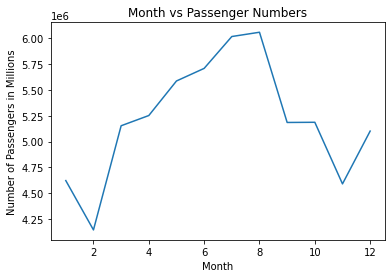

In [30]:
# Let's do some graphing
# Let's start with PM data

X_PMNY1 = JFK_Passenger_PM_Data['Month']
Y_PMNY1 = JFK_Passenger_PM_Data['Passenger']
plt.plot(X_PMNY1, Y_PMNY1)

plt.title('Month vs Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers in Millions')

Text(0, 0.5, 'PM2.5 Concentrations')

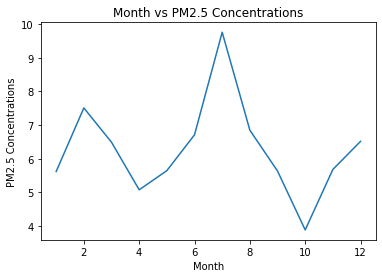

In [31]:
X_PMNY2 = JFK_Passenger_PM_Data['Month']
Y_PMNY2 = JFK_Passenger_PM_Data['Daily Mean PM2.5 Concentration']
plt.plot(X_PMNY2, Y_PMNY2)

plt.title('Month vs PM2.5 Concentrations')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentrations')

In [32]:
print("The r squared value for NY was,", Nr_squared)

The r squared value for NY was, 0.08685602227865585


# PM in LA

Text(0, 0.5, 'Number of Passengers in Millions')

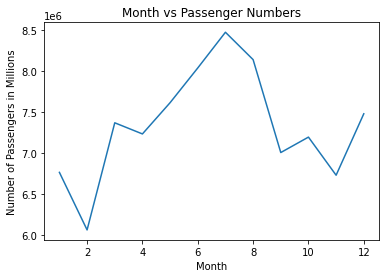

In [33]:
X_PMLA1 = LAX_Passenger_PM_Data['Month']
Y_PMLA1 = LAX_Passenger_PM_Data['Passenger']
plt.plot(X_PMLA1, Y_PMLA1)

plt.title('Month vs Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers in Millions')

Text(0, 0.5, 'PM2.5 Concentrations')

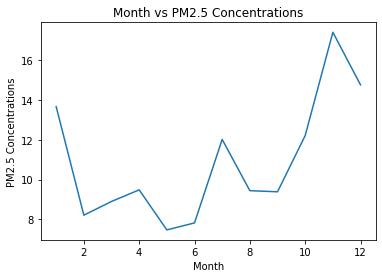

In [34]:
X_PMLA2 = LAX_Passenger_PM_Data['Month']
Y_PMLA2 = LAX_Passenger_PM_Data['Daily Mean PM2.5 Concentration']
plt.plot(X_PMLA2, Y_PMLA2)

plt.title('Month vs PM2.5 Concentrations')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentrations')

In [35]:
print("The r squared value for LA was,", Cr_squared)

The r squared value for LA was, 0.03270438585228865


# PM in ATL

Text(0, 0.5, 'Number of Passengers in Millions')

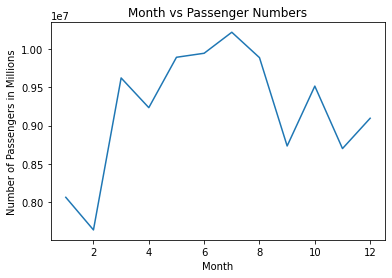

In [36]:
X_PMATL1 = ATL_Passenger_PM_Data['Month']
Y_PMATL1 = ATL_Passenger_PM_Data['Passenger']
plt.plot(X_PMATL1, Y_PMATL1)

plt.title('Month vs Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers in Millions')

Text(0, 0.5, 'PM2.5 Concentrations')

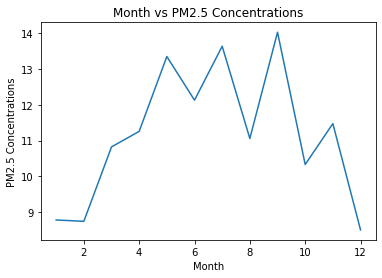

In [37]:
X_PMATL2 = ATL_Passenger_PM_Data['Month']
Y_PMATL2 = ATL_Passenger_PM_Data['Daily Mean PM2.5 Concentration']
plt.plot(X_PMATL2, Y_PMATL2)

plt.title('Month vs PM2.5 Concentrations')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentrations')

In [38]:
print("The r squared value for ATL was,", Gr_squared)

The r squared value for ATL was, 0.32770837038131034


# NO2 in NY

Text(0, 0.5, 'Number of Passengers in Millions')

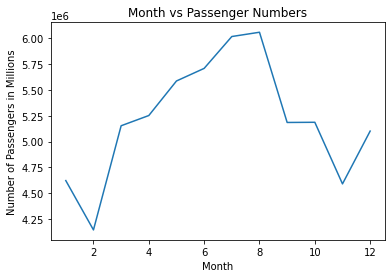

In [39]:
X_NO2NY1 = JFK_Passenger_NO2_Data['Month']
Y_NO2NY1 = JFK_Passenger_NO2_Data['Passenger']
plt.plot(X_NO2NY1, Y_NO2NY1)

plt.title('Month vs Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers in Millions')

Text(0, 0.5, 'NO2 Concentrations')

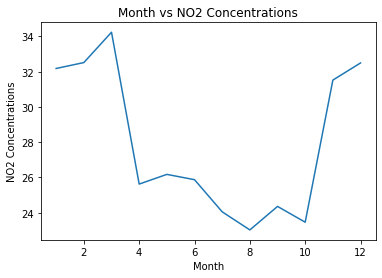

In [40]:
X_NO2NY2 = JFK_Passenger_NO2_Data['Month']
Y_NO2NY2 = JFK_Passenger_NO2_Data['Daily Max 1-hour NO2 Concentration']
plt.plot(X_NO2NY2, Y_NO2NY2)

plt.title('Month vs NO2 Concentrations')
plt.xlabel('Month')
plt.ylabel('NO2 Concentrations')

In [41]:
print("The r squared value for NY was,", r_squaredNY2)

The r squared value for NY was, 0.5214982052169448


# NO2 in LA

Text(0, 0.5, 'Number of Passengers in Millions')

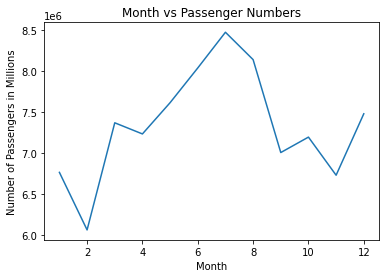

In [42]:
X_NO2LA1 = LAX_Passenger_NO2_Data['Month']
Y_NO2LA1 = LAX_Passenger_NO2_Data['Passenger']
plt.plot(X_NO2LA1, Y_NO2LA1)

plt.title('Month vs Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers in Millions')

Text(0, 0.5, 'NO2 Concentrations')

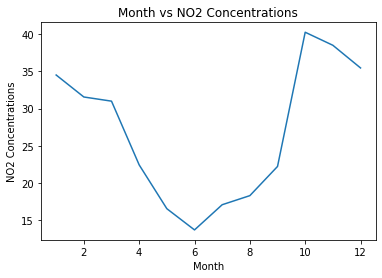

In [43]:
X_NO2LA2 = LAX_Passenger_NO2_Data['Month']
Y_NO2LA2 = LAX_Passenger_NO2_Data['Daily Max 1-hour NO2 Concentration']
plt.plot(X_NO2LA2, Y_NO2LA2)

plt.title('Month vs NO2 Concentrations')
plt.xlabel('Month')
plt.ylabel('NO2 Concentrations')

In [44]:
print("The r squared value for LA was,", r_squaredCA2)

The r squared value for LA was, 0.43592893374331537


# NO2 in ATL

Text(0, 0.5, 'Number of Passengers in Millions')

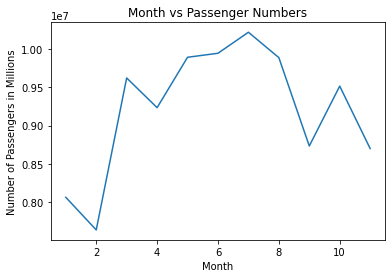

In [45]:
X_NO2ATL1 = ATL_Passenger_NO2_Data['Month']
Y_NO2ATL1 = ATL_Passenger_NO2_Data['Passenger']
plt.plot(X_NO2ATL1, Y_NO2ATL1)

plt.title('Month vs Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers in Millions')

Text(0, 0.5, 'NO2 Concentrations')

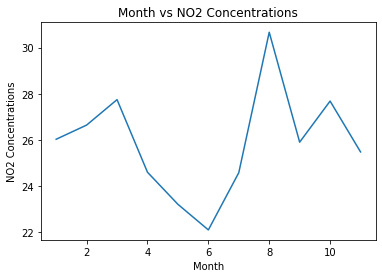

In [46]:
X_NO2ATL2 = ATL_Passenger_NO2_Data['Month']
Y_NO2ATL2 = ATL_Passenger_NO2_Data['Daily Max 1-hour NO2 Concentration']
plt.plot(X_NO2ATL2, Y_NO2ATL2)

plt.title('Month vs NO2 Concentrations')
plt.xlabel('Month')
plt.ylabel('NO2 Concentrations')

In [47]:
print("The r squared value for ATL was,", r_squaredGA2)

The r squared value for ATL was, 0.016858821682929348


# SO2 in NY

Text(0, 0.5, 'Number of Passengers in Millions')

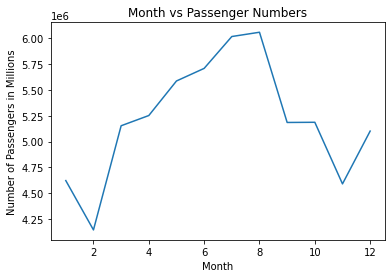

In [48]:
X_SO2NY1 = JFK_Passenger_SO2_Data['Month']
Y_SO2NY1 = JFK_Passenger_SO2_Data['Passenger']
plt.plot(X_SO2NY1, Y_SO2NY1)

plt.title('Month vs Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers in Millions')

Text(0, 0.5, 'SO2 Concentrations')

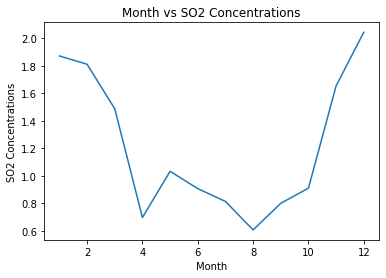

In [49]:
X_SO2NY2 = JFK_Passenger_SO2_Data['Month']
Y_SO2NY2 = JFK_Passenger_SO2_Data['Daily Max 1-hour SO2 Concentration']
plt.plot(X_SO2NY2, Y_SO2NY2)

plt.title('Month vs SO2 Concentrations')
plt.xlabel('Month')
plt.ylabel('SO2 Concentrations')

In [50]:
print("The r squared value for NY was,", r_squaredNY3)

The r squared value for NY was, 0.5688063845614276


# SO2 in LA

Text(0, 0.5, 'Number of Passengers in Millions')

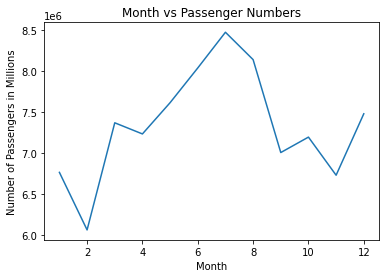

In [51]:
X_SO2LA1 = LAX_Passenger_SO2_Data['Month']
Y_SO2LA1 = LAX_Passenger_SO2_Data['Passenger']
plt.plot(X_SO2LA1, Y_SO2LA1)

plt.title('Month vs Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers in Millions')

Text(0, 0.5, 'SO2 Concentrations')

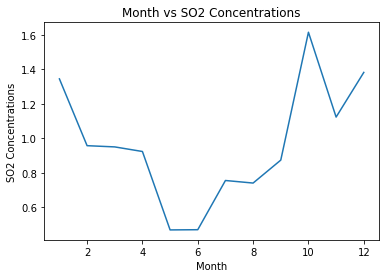

In [52]:
X_SO2LA2 = LAX_Passenger_SO2_Data['Month']
Y_SO2LA2 = LAX_Passenger_SO2_Data['Daily Max 1-hour SO2 Concentration']
plt.plot(X_SO2LA2, Y_SO2LA2)

plt.title('Month vs SO2 Concentrations')
plt.xlabel('Month')
plt.ylabel('SO2 Concentrations')

In [53]:
print("The r squared value for LA was,", r_squaredCA3)

The r squared value for LA was, 0.21425827242306347


# SO2 in ATL

Text(0, 0.5, 'Number of Passengers in Millions')

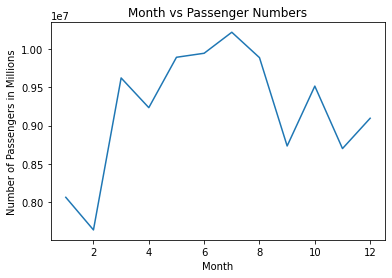

In [54]:
X_SO2ATL1 = ATL_Passenger_SO2_Data['Month']
Y_SO2ATL1 = ATL_Passenger_SO2_Data['Passenger']
plt.plot(X_SO2ATL1, Y_SO2ATL1)

plt.title('Month vs Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers in Millions')

Text(0, 0.5, 'SO2 Concentrations')

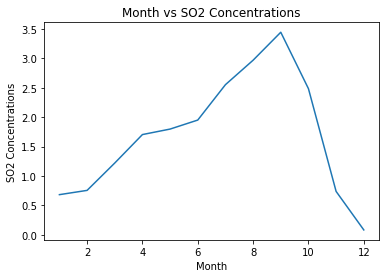

In [55]:
X_SO2ATL2 = ATL_Passenger_SO2_Data['Month']
Y_SO2ATL2 = ATL_Passenger_SO2_Data['Daily Max 1-hour SO2 Concentration']
plt.plot(X_SO2ATL2, Y_SO2ATL2)

plt.title('Month vs SO2 Concentrations')
plt.xlabel('Month')
plt.ylabel('SO2 Concentrations')

In [56]:
print("The r squared value for ATL was,", r_squaredGA3)

The r squared value for ATL was, 0.24579319961442422


# DAY Data